### Import libraries

In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
from fastai.imports import *
from fastai.models import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.plots import *

In [31]:
PATH ='/home/vishnu/Documents/DeepLearningProjects/data/dogbreeds/'

In [32]:
ls /home/vishnu/Documents/DeepLearningProjects/data/dogbreeds//

labels.csv  sub/  test/  tmp/  train/


### Explore data

In [33]:
labelDF=pd.read_csv(PATH+"labels.csv")
labelDF.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [34]:
labelDF.pivot_table(index='breed',aggfunc=len).sort_values('id',ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


### Set image and batch size and architecture

In [35]:
image_size=224
batch_size=16
arch=resnext101_64

### Transformation & Load the data  
side should be on no upside down since cat or dog can never be seen upside down.
load data into dataset call data loader
check for the image size if size is above 300 return original image else resize it to 340 and rename it to tmp.

In [36]:
tfms = tfms_from_model(arch, image_size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, folder='train', csv_fname=f'{PATH}/labels.csv',suffix='.jpg',
                                        test_name='test', tfms=tfms, bs=batch_size, num_workers=4)

### Some more exploration of image sizes.
Using ; you can write multiple python statements in 1 line

In [37]:
fn=PATH+data.trn_ds.fnames[4];fn

'/home/vishnu/Documents/DeepLearningProjects/data/dogbreeds/train/00290d3e1fdd27226ba27a8ce248ce85.jpg'

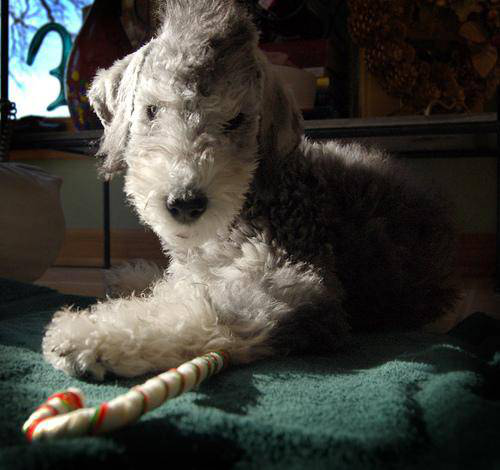

In [38]:
img=PIL.Image.open(fn); img

In [39]:
img.size

(500, 470)

In [40]:
size_d={k : PIL.Image.open(PATH+k).size  for k in data.trn_ds.fnames}
size_d

{'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg': (500, 375),
 'train/001cdf01b096e06d78e9e5112d419397.jpg': (500, 375),
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg': (500, 500),
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg': (500, 375),
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg': (500, 470),
 'train/002a283a315af96eaea0e28e7163b21b.jpg': (231, 227),
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg': (500, 332),
 'train/0067dc3eab0b3c3ef0439477624d85d6.jpg': (402, 343),
 'train/006cc3ddb9dc1bd827479569fcdc52dc.jpg': (250, 223),
 'train/00792e341f3c6eb33663e415d0715370.jpg': (200, 192),
 'train/007b5a16db9d9ff9d7ad39982703e429.jpg': (374, 212),
 'train/007b8a07882822475a4ce6581e70b1f8.jpg': (333, 500),
 'train/007ff9a78eba2aebb558afea3a51c469.jpg': (500, 375),
 'train/008ba178d6dfc1a583617470d19c1673.jpg': (390, 320),
 'train/009509be3ca7cce0ff9e37c8b09b1125.jpg': (400, 346),
 'train/00a338a92e4e7bf543340dc849230e75.jpg': (200, 280),
 'train/00a366d4b4a9bbb6c8a63126697b7656.jpg': (500, 375

In [41]:
row_sz,col_sz= list(zip(*(size_d.values())))

In [42]:
row_sz=np.array(row_sz) ; col_sz=np.array(col_sz)

using , we can print 2 values at the same time.

In [43]:
row_sz[:5], col_sz[:5]

(array([500, 500, 500, 500, 500]), array([375, 375, 500, 375, 470]))

(array([3023., 5024.,   92.,   15.,    5.,    3.,   13.,    2.,    0.,    1.]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9, 2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

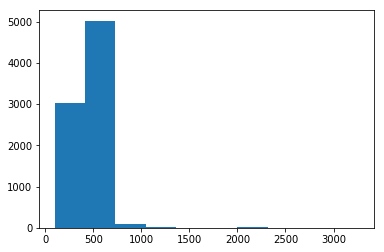

In [44]:
plt.hist(row_sz)

(array([ 135.,  592., 1347., 1164., 4599.,  128.,   76.,   62.,   14.,   11.]),
 array([ 97. , 185.5, 274. , 362.5, 451. , 539.5, 628. , 716.5, 805. , 893.5, 982. ]),
 <a list of 10 Patch objects>)

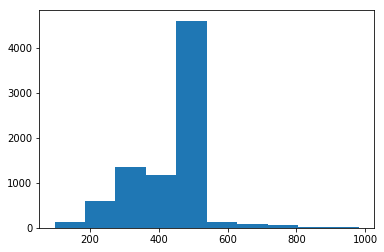

In [45]:
plt.hist(row_sz[row_sz<1000])

most of the images are about size 500 , you can see in printed array above graph 5th number is 4599 i.e approx 4599 images have width 500.

(array([2870., 5121.,  128.,   25.,   10.,   15.,    5.,    2.,    0.,    2.]),
 array([ 102.,  348.,  594.,  840., 1086., 1332., 1578., 1824., 2070., 2316., 2562.]),
 <a list of 10 Patch objects>)

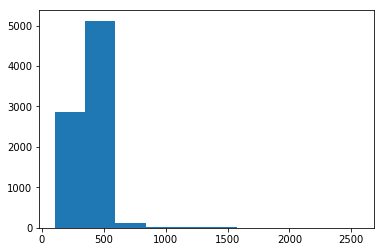

In [46]:
plt.hist(col_sz)

(array([ 235.,  733., 2205., 2979., 1807.,   98.,   27.,   33.,    7.,   10.]),
 array([102., 190., 278., 366., 454., 542., 630., 718., 806., 894., 982.]),
 <a list of 10 Patch objects>)

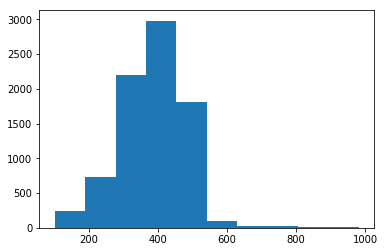

In [47]:
plt.hist(col_sz[col_sz<1000])

most of the images are about size 250 to 450 , you can see in printed array above graph 2205,2979,1807 i.e resp approx those many images have height 300 to 400.

In [48]:
len(data.trn_ds)# , len(data.test_ds)

8178

In [49]:
len(data.classes), data.classes[:5]

(120,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier'])

### Create validation set

In [50]:
labels=f'{PATH}/labels.csv'
n=len(list(open(labels)))-1 #open labels file and make into list of filenames and count it -1 bcz there is a header
val_idxs=get_cv_idxs(n) # get random 20% of indexes of file names to be used for validation ; get cross-validation indexes
n,len(val_idxs)

(10222, 2044)

In [51]:
val_idxs

array([2882, 4514, 7717, ..., 8922, 6774,   37])

### Recheck image size and Load the data  
side should be on no upside down since cat or dog can never be seen upside down.
load data into dataset call data loader
check for the image size if size is above 300 return original image else resize it to 340 and rename it to tmp.

In [52]:
def get_data(image_size,batch_size):
    tfms = tfms_from_model(arch, image_size, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, folder='train', csv_fname=f'{PATH}/labels.csv',suffix='.jpg',
                                        test_name='test', tfms=tfms, bs=batch_size, num_workers=4)
    return data if image_size>300 else data.resize(340,'tmp')

In [53]:
data=get_data(image_size,batch_size)

### Define Model and train it

In [54]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

In [55]:
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy                     
    0      0.732111   0.333553   0.894325  
    1      0.479254   0.301541   0.901663                     
    2      0.399999   0.294185   0.909002                     
    3      0.265956   0.270955   0.914384                     
    4      0.242687   0.283732   0.914384                     



[array([0.28373]), 0.9143835616438356]

In [56]:
data=get_data(image_size,batch_size)

In [57]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf=learn.lr_find()

 78%|███████▊  | 397/512 [00:03<00:01, 108.83it/s, loss=7.59]


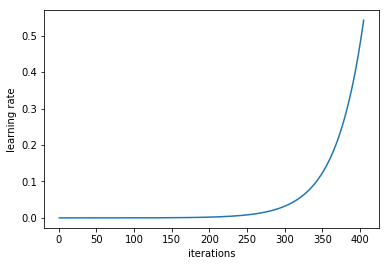

In [58]:
learn.sched.plot_lr()

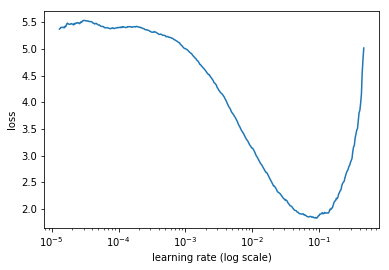

In [59]:
learn.sched.plot()

In [60]:
learn.precompute=False

In [61]:
#we should go for LR=0.01 i.e 10^-2, since after 10^-1 loss is gonna increase
learn.fit(1e-2, 5, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.693043   0.321785   0.900196  
    1      0.569754   0.26475    0.91683                     
    2      0.456455   0.252739   0.919765                    
    3      0.424788   0.257266   0.917319                    
    4      0.392404   0.246525   0.920254                    



[array([0.24653]), 0.9202544031311155]

In [62]:
learn.save('224_lastlayer')

In [63]:
learn.load('224_lastlayer')

### increase image size to fight overfitting

In [64]:
learn.set_data(get_data(299,batch_size))
learn.freeze()

In [66]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.244636   0.23278    0.928571  
    1      0.310078   0.23869    0.926614                    
    2      0.231163   0.232922   0.923679                    
    3      0.209379   0.251006   0.918297                    
    4      0.177688   0.248562   0.920744                    
    5      0.164732   0.237306   0.922701                    
    6      0.15668    0.238452   0.92319                     



[array([0.23845]), 0.9231898238747553]

In [67]:
learn.save('299_all')

In [68]:
learn.load('224_all')

### Check accuracy on valid set

In [70]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [72]:
probs

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.00003, 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.00001, 0.     , 0.     ],
       ...,
       [0.00001, 0.     , 0.     , ..., 0.     , 0.00001, 0.00001],
       [0.     , 0.     , 0.     , ..., 0.     , 0.00001, 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ]], dtype=float32)

In [74]:
from sklearn import metrics

In [73]:
accuracy_np(probs, y)

0.928082191780822

In [75]:
probs.shape

(2044, 120)

In [94]:
learn.save('299_all')

### Creating submission file using test set

In [69]:
data.test_ds.fnames

['test/48affd737a322f7f6b4bf9367a5f3ae4.jpg',
 'test/ad8db033602b45cc7006f5e534ca8f08.jpg',
 'test/dc8f2d7265bf853fce9e87585cd63853.jpg',
 'test/9bb4213b044033a0efffc81fefda6d2b.jpg',
 'test/adbea7e1520c940fba5990b23ee9a625.jpg',
 'test/c1487e8b751bd17f4ffafacc256c3c8a.jpg',
 'test/48c28031abfec1f80d1e1cbbc064d9d5.jpg',
 'test/6745cdcdaf788e189b88392e8294f82d.jpg',
 'test/60b0ec74de27b2f5d88c26ce9839eb13.jpg',
 'test/0fb39410b417652816759e4ae87f5f57.jpg',
 'test/e2b808864a5253fd356a9032915447a1.jpg',
 'test/a71f9dcc0cad1fac04ce95c3d4303b02.jpg',
 'test/2d6b6491c6376e487f40c222079950ba.jpg',
 'test/cd1df9dc088633be47adc596dd104656.jpg',
 'test/745cf5a1e6bbd3b44dcff5b3733e6827.jpg',
 'test/8d243d285e72a16d8c266866f5e6738e.jpg',
 'test/03a6a4c713d657d53a804ebe1fb2b02c.jpg',
 'test/8e6a11df866b85cfb0f921b7947ae77d.jpg',
 'test/e9c38696d381e66971cc328e767fad27.jpg',
 'test/5ca64c04f1838d21cb59d75357707b50.jpg',
 'test/69e231ddd06ed66f4517f695908c7e6e.jpg',
 'test/e0165801e47527205e45295aba4

In [77]:
log_preds,y = learn.TTA(is_test=True)

In [78]:
#probs = np.exp(log_preds)
probs=np.mean(np.exp(log_preds),0)

In [79]:
probs.shape

(10357, 120)

In [80]:
df=pd.DataFrame(probs)
df.columns=data.classes

In [81]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,48affd737a322f7f6b4bf9367a5f3ae4,2.182028e-11,6.728823e-13,5.653933e-12,2.790213e-10,8.393108e-11,1.474309e-11,2.243267e-10,3.552624e-09,3.577321e-12,...,9.718464e-01,2.577993e-09,3.202979e-10,2.124044e-12,4.747267e-13,1.325020e-12,4.853122e-12,4.441496e-14,1.357104e-13,1.030347e-08
1,ad8db033602b45cc7006f5e534ca8f08,3.661830e-07,7.375360e-06,3.012648e-05,3.714552e-06,6.555590e-06,1.523756e-06,1.042148e-05,1.065365e-06,5.357198e-06,...,8.393205e-06,9.912112e-07,1.422586e-05,8.766365e-06,3.847140e-05,1.327752e-05,1.464779e-06,9.578634e-07,9.274062e-07,2.456075e-06
2,dc8f2d7265bf853fce9e87585cd63853,5.349672e-07,1.575105e-06,5.845709e-06,1.098644e-04,1.048165e-06,2.277025e-07,5.228717e-06,3.847484e-06,3.297985e-07,...,5.093874e-07,5.780513e-07,4.599700e-05,2.864296e-07,1.401969e-07,3.790530e-05,2.453242e-06,4.341944e-07,1.007722e-02,1.989332e-06
3,9bb4213b044033a0efffc81fefda6d2b,6.326006e-10,6.818539e-10,2.876198e-07,5.599437e-11,4.046262e-09,1.176508e-07,2.307378e-10,1.160970e-07,3.539497e-10,...,4.120839e-09,3.262241e-10,4.271176e-09,1.084711e-08,5.596309e-10,6.276146e-10,5.326466e-10,4.877260e-09,3.314122e-09,2.879054e-10
4,adbea7e1520c940fba5990b23ee9a625,6.930436e-09,5.991514e-08,1.764336e-07,1.384506e-08,1.025118e-08,3.209222e-10,4.026087e-10,1.142998e-08,2.244260e-09,...,1.083858e-05,3.581981e-08,3.365066e-08,2.180394e-08,1.862033e-07,7.449888e-10,6.534616e-09,9.378633e-09,1.765588e-09,2.844157e-10


In [82]:
SUBM = f'{PATH}sub/' 
os.makedirs(SUBM, exist_ok=True) 
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [83]:
FileLink(f'{SUBM}subm.gz')

/home/vishnu/Documents/DeepLearningProjects/data/dogbreeds/sub/subm.gz

### individual prediction


In [84]:
fn=data.val_ds.fnames[0]
fn

'train/000bec180eb18c7604dcecc8fe0dba07.jpg'

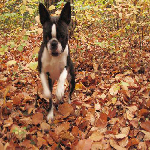

In [85]:
PIL.Image.open(PATH+fn).resize((150,150))

In [86]:
trn_tfms,val_tfms=tfms_from_model(arch,image_size)

In [87]:
ds=FilesIndexArrayDataset([fn],np.array([0]),val_tfms,PATH)
dl=DataLoader(ds)
preds=learn.predict_dl(dl)

In [88]:
np.argmax(preds)

19

In [ ]:
im = val_tfms(Image.open(PATH+fn))
preds = learn.predict_array(im[None])
np.argmax(preds)